# Project Acredius Data Scientist DataSet - Step by Step Application

The aim of this project is the prediction through regression methods of the interest loan rate of customers who are approved to get a loan. We are in the presence of Supervised Learning problem.

It was supplied a raw dataset with some data from several clients, besides the features it was incorporated a target variable, Taux, that we will use to validate our model.

This is a step by step guide of a this Project.

This Project is divided in 4 different Chapters,

- **Chapter 1.** Identification & Study of the dataset.
- **Chapter 2.** EDA - Outliers, NaN & Characteristics.
- **Chapter 3.** Modelling
- **Chapter 4.** Conclusions

## Chapter 1. Identification & Study of the Dataset

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import DataSet

In [2]:
df = pd.read_excel('Acredius_-_Data_Scientist_-_Case_study_data_2022_12.xlsx')
df.head()

,ID,Pays,Taux,Mois,Montant,Niveau de risque,Emprunteur,capital social,année de création,Antériorité,...,Dettes Nettes / EBE(* années) 17,Dettes Nettes / EBE(* années) 18,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Dettes Nettes / Fonds propres 17,Dettes Nettes / Fonds propres 18,BFRE en nombre de jours de CA 15,BFRE en nombre de jours de CA 16,BFRE en nombre de jours de CA 17,BFRE en nombre de jours de CA 18
0,755334684,France,"5,85 %",48,1 100 000 €,B,Ets Provost Frères,3 058 500 €,1962,1991,...,"9,18*","4,26*",NaN,"125,88%","97,66%","66,94%",NaN,367,252,200.0
1,666598628,Espagne,"5,50 %",48,310 000 €,B+,INTERNATIONAL STUDIES SA,396 072 €,1985,1998,...,"0,32 *","0,11 *",NaN,"21,51%","19,20%","8,46%",NaN,NaN,NaN,NaN
2,528199436,Pays-Bas,"6,45 %",48,165 000 €,B,Docufiller Sales,900,2016,2016,...,"-0,01*","0,47*",NaN,"2870,00%","-7,69%","135,48%",NaN,102,-19,71.0
3,353279184,France,0.06,60,2 000 000 €,B,E.B.P.,10 000 €,2016,2014,...,"3,34*","2,99*",NaN,NaN,"157,76%","156,74%",NaN,NaN,45,35.0
4,633690177,Italie,"4,90 %",36,100 000 €,B+,Deltagamma,10 000 €,2003,2003,...,"2,38 *","0,30 *",NaN,"-0,22","0,23","0,12",NaN,NaN,NaN,NaN


### 1.1 DataSet - Identification & Study

This subchapter will guide the rest of our project namely the steps to prepare our dataset to be feeded to a model that will be define later.

In [3]:
df.shape

(688, 87)

We are in the presence of a small dataset with a clear unbalanced between number of data entries and features. Feeding a dataset with this shape will result in non generalize model with a probable overfitting.

So, before we fit any model, the number of features must be drastically reduced.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      688 non-null    int64  
 1   Pays                                    688 non-null    object 
 2   Taux                                    688 non-null    object 
 3   Mois                                    688 non-null    int64  
 4   Montant                                 688 non-null    object 
 5   Niveau de risque                        688 non-null    object 
 6   Emprunteur                              688 non-null    object 
 7   capital social                          688 non-null    object 
 8   année de création                       688 non-null    int64  
 9   Antériorité                             688 non-null    object 
 10  effectifs                               687 non-null    object

Our dataset has a mix of categorical and numeric variables. Categorical variables have to be treated (transformed to numeric). If we look to the cell below (is an example, this happens in various number of features), we see that our target varible is an Object because we have a mix of string and numeric entries.

So, we must threat all of our dataset before we try to make any conclusions of it.

In [5]:
df['Taux'].unique()

array(['5,85 %', '5,50 % ', '6,45 %', 0.06, '4,90 %', '6,75 %', '5,95 %',
       '6,90 %', '7,10 %', '5,50 %', '4,25 %', '4,60 %', '4,70 %',
       '5,80 %', '5,75 %', '6,20 %', '4,85 %', '6,70 %', '6,05 %',
       '6,50 %', '5,05 %', '5,25 %', '5,60 %', '6,30 %', '4,65 %',
       '7,25 %', 0.05, '4,95 %', '5,90 %', '7,50 %', '6,40 %', '4,80 %',
       '4,50 %', '6,25 %', '2,50 %', '5,10 %', '6,60 %', '3,60 %',
       '5,40 %', '7,40 %', '6,10 %', '4,35 %', '5,20 %', '5,65 %',
       '6,80 %', '5,70 %', '4,75 %', '5,60 % ', '6,50 % ', '5,15 % ',
       '6,55 %', 0.09, '3,50 % ', '6,75 % ', '4,50 % ', '6,20 % ',
       '5,35 %', '3,90 %', '6,95 %', '7,05 %', '4,15 %', '7,15 %',
       '7,70 %', '3,25 %', 0.07, '7,20 %', '9,90 %', '5,45 %', '7,75 %',
       '6,65 %', '8,20 %', '7,55 %', '5,30 %', '4,20 %', '4,10 %',
       '3,40 %', '6,35 %', '3,10 %', '4,45 %', '3,45 %', '8,70 %', 0.04,
       '3,50 %', 0.08, '3,75 %', '8,50 %', '8,80 %', '8,75 %', '8,25 %',
       '6,99 %', '6,15 %', '

In [6]:
df.isna().sum()

ID                                    0
Pays                                  0
Taux                                  0
Mois                                  0
Montant                               0
                                   ... 
Dettes Nettes / Fonds propres 18    562
BFRE en nombre de jours de CA 15    502
BFRE en nombre de jours de CA 16    440
BFRE en nombre de jours de CA 17    500
BFRE en nombre de jours de CA 18    613
Length: 87, dtype: int64

We have 81 features with NaN values, that have to be drop/replace. Some of our features have around 90% of NaN values.

Drop or impute will be steps incorporated in the model.

### 1.2 Data Cleaning

We will now perform some data cleaning in our dataset, with in mind what we already see above.

Removing special characters, blank spaces and pass features to numeric will be some subjects that will be done in this subchapter.

#### 1.2.1 Drop Features 

As we seen before we have features that have a big part of its composition with NaN values.

Usually when we are in the presence of NaN we have to options, replace or drop. As we have features with more than 50% NaN values and, and as we'll see in the course of this project, with a considerable number of outliers. I decided to drop features that have more than 50% NaN values, because impute into these feature with any metric available or by imputation will introduce a considerable bias that will affect our modelling, preventing it to be satisfatory regarding accuracity and production usability.

In [7]:
#We will drop the features that have more than 50% of NaN values in their composition
df.dropna(thresh = df.shape[0]*0.50, how = 'all', axis = 1, inplace = True)
df.shape

(688, 32)

We obtain a dataset with still 32 features.

If we analyse our data we have several features that can be labeled as "accessory", features that are unique or will be noise to our model, such as the ID of the company, year of their creation or Borrower.

These features will be dropped. 

In [8]:
#We will drop unnecessary columns that will be acessory to our model
columns_drop = ['ID', 'Pays', 'Emprunteur', 'année de création', 'Antériorité']

df.drop(columns_drop, axis = 1, inplace = True)

#### 1.2.2 Feature Cleaning 

As we saw, we have several categorical variables that are a mix between string and numeric entries.

In this subchapter we will focus in the removal transformation of this strings into numeric variables, we will treat blank spaces, special characters, etc.

Many of our "numeric" entries that are identified as strings, have a comma instead of a point. Python only recognizes floats with a point separator.

We will replace every single comma in our dataset for points.

In [9]:
df=df.replace(',','.',regex=True)

The four columns below instead of a specific value for a data entry have a range of possible values (p.ex, 5 - 10), we will get the first number as our entry for that cell.

For example, a value as 5 - 10, will be 5, a value of 0 - 5 will be 0 and so on.

In [10]:
df['Resultat Net 15'] = df['Resultat Net 15'].astype('str')
df['Resultat Net 15'] = df['Resultat Net 15'].str.extract(r'([0-9.]{1,6})')
df['Resultat Net 16'] = df['Resultat Net 16'].astype('str')
df['Resultat Net 16'] = df['Resultat Net 16'].str.extract(r'([0-9.]{1,6})')
df['EBE(retraité des loyers de leasing) 16'] = df['EBE(retraité des loyers de leasing) 16'].astype('str')
df['EBE(retraité des loyers de leasing) 16'] = df['EBE(retraité des loyers de leasing) 16'].str.extract(r'([0-9.]{1,6})')
df['EBE(retraité des loyers de leasing) 15'] = df['EBE(retraité des loyers de leasing) 15'].astype('str')
df['EBE(retraité des loyers de leasing) 15'] = df['EBE(retraité des loyers de leasing) 15'].str.extract(r'([0-9.]{1,6})')

We have several special characters in our dataset yet, such as %, * or +. The last one we will keep it for now, since it's present in a categorical variable that will be transformed during the project.

In [11]:
#We will just keep the +, it will be important for our Niveau de Risque feature
df = df.replace(r'[^0-9a-zA-Z+.]', '', regex=True).replace("'", '')

#We will strip right and left our data string entries
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

#We will remove white spaces in between strings in the same data entry
df = df.applymap(lambda x: x.replace(' ','') if type(x)==str else x)

------------------------------------
------------------------------------

### 1.3 Feature Transformation

We have several features that need to be transformed into values that can be feeded to the model.

#### 1.3.1 - Niveau de Risque

In [12]:
df['Niveau de risque'].unique()

array(['B', 'B+', 'C', 'A+', 'A'], dtype=object)

Niveau de Risque has 5 different categorical variables, we need to transform this into valid values to be able to advance.

We will one hote encode this variable, with pandas get_dummies function, where will obtain 5 new columns as a sparse matrix (less time and GPU consuming) and will drop the original feature.

In [13]:
niveau_risque = df['Niveau de risque']
df = pd.concat([df, pd.get_dummies(df['Niveau de risque'], prefix = 'Risque_')], axis = 1)
df.drop('Niveau de risque', axis = 1, inplace = True)

#### 1.3.2 - Mapping Features

As you saw above with the interval range entries, we have some data that was not correctly inserted, we have values that are just numeric but others that are a string.

With the help of bin cutting (this can be done too, with the simple removal of the word month), we will replace the entries by the correct value.

In [14]:
df['Nombre de mois de la période 16'].unique()

array([12, nan, '12mois', '16mois', '7mois', '6mois', '15mois', '9.5mois',
       '23mois', '22mois', '11mois', '', '8mois'], dtype=object)

Let's remove the mois from our strings.

In [15]:
df['Nombre de mois de la période 16'] = df['Nombre de mois de la période 16'].map({'12mois':12,'':np.nan,12:12,'7mois':7,'16mois':16,
                                                                                  '6mois':6,'15mois':15,'9.5mois':9.5,'23mois':23,'22mois':22,
                                                                                  '11mois':11,'8mois':8})
df['Nombre de mois de la période 17'] = df['Nombre de mois de la période 17'].map({'12mois':12,'12':12,'':np.nan,12:12,9:9,21:21,6:6,
                                                                                  '15mois': 15, '18mois':18, '9mois': 9,'31102017':np.nan})

Feature effectifs had too a interval range of possible employees, as you remembered we remove the most of the special characters from our dataset and - was one of them. So we will now map the features that we have left to valid values, the greater value of the range will be incorporated in the dataset.

In [16]:
df.effectifs = df.effectifs.map({'1150':50,'110':10, '51250':250,'2511000':1000, '2511.000':1000,'':np.nan,
                                 'Plusde1000': 2000, 'Plusde600' : 1000 })

#### 1.3.3 Target Feature Inconsistency

In our target feature we have a mix of numbers, percentage and decimal, that are both valids.

So we will transform the percentage values that we have to decimal ones. To do this we build a small function.

In [17]:
def taux_percentage(df, column):
    ''' Function to pass all percentage numbers to non percentage numbers'''
    df[column] = df[column].apply(pd.to_numeric, errors='coerce')
    index = 0
    for i in df[column]:
        if i > 1:
            df[column][index] = i / 100
        index += 1
    return df
taux_percentage(df, 'Taux')

C:\Users\alvar\AppData\Local\Temp/ipykernel_22820/3201663458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = i / 100


,Taux,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
0,0.0585,48,1100000,3058500,50.0,12.0,12.0,NaN,16801,NaN,...,42.92,NaN,12.74,NaN,125.88,0,0,1,0,0
1,0.0550,48,310000,396072,50.0,12.0,12.0,NaN,1579,NaN,...,38.70,NaN,0.47,NaN,21.51,0,0,0,1,0
2,0.0645,48,165000,900,10.0,12.0,12.0,NaN,514,NaN,...,1.82,NaN,1.02,NaN,2870.00,0,0,1,0,0
3,0.0600,60,2000000,10000,250.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
4,0.0490,36,100000,10000,NaN,12.0,12.0,NaN,790,NaN,...,58.62,NaN,0.99,NaN,0.22,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.0800,36,150000,3100,10.0,NaN,NaN,2718,9424,246.72,...,6.21,2.96,2.83,-5.49,3.9,0,0,0,0,1
684,0.0700,60,1050000,900800,250.0,NaN,NaN,8840,8468,6.59,...,0.36,1.34,2.02,2.36,1.86,0,0,1,0,0
685,0.0950,60,210000,129215,10.0,NaN,NaN,1681,,,...,,4.17,,0.56,,0,0,0,0,1
686,0.0700,36,105000,727041,10.0,NaN,NaN,723,,,...,,1.76,,0.43,,0,0,1,0,0


----------------------------

#### 1.3.4 Data Type Change 

Most of our entries are already transformed as numeric, however we will pass every data entry to the function below and transform it to float, the ones that are not able to be transformed will stay as NaN values.

In [18]:
def func(x):
    try:
        return float(x)
    except:
        return np.nan
    
for column in df.columns:
    df[column] = df[column].apply(func)

#### 1.3.5 DataSet Visualization

In [19]:
df.head()

,Taux,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
0,0.0585,48.0,1100000.0,3058500.0,50.0,12.0,12.0,NaN,16801.0,NaN,...,42.92,NaN,12.74,NaN,125.88,0.0,0.0,1.0,0.0,0.0
1,0.0550,48.0,310000.0,396072.0,50.0,12.0,12.0,NaN,1579.0,NaN,...,38.70,NaN,0.47,NaN,21.51,0.0,0.0,0.0,1.0,0.0
2,0.0645,48.0,165000.0,900.0,10.0,12.0,12.0,NaN,514.0,NaN,...,1.82,NaN,1.02,NaN,2870.00,0.0,0.0,1.0,0.0,0.0
3,0.0600,60.0,2000000.0,10000.0,250.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
4,0.0490,36.0,100000.0,10000.0,NaN,12.0,12.0,NaN,790.0,NaN,...,58.62,NaN,0.99,NaN,0.22,0.0,0.0,0.0,1.0,0.0


We will save the dataset cleaned to a csv file to be able to use it in another modelling or tasks.

In [20]:
df.to_csv('Final_Data_Cleansing.csv', index=False)

## Chapter 2. EDA - Outliers, NaN & Characteristics.

### 2.1 - Introduction

In this section we will verify some features regarding the presence of outliers or not.

As you can understand, my lack knowdledge in this subject and absence of some glossary makes this task harder because I'm not able to understand deeply which outliers are reasonable or not. Due to this I decide to drop/replace just some outliers and keep the generic information from the initial dataset.
Of course this decision will impact the model, however making changes over things that I can assess if are reasonable will impact even more the dataset, however, we'll have better idea when we finish the modelling step.

### 2.2 - Outliers

#### 2.2.1 Outliers Detecion & Distribution Analysis

Most of our features follows a right skewed distribution, where we have outliers in our right side of our distribution. This makes the average being pushed to the right reaching higher values.

Mode is the central point of our distribution with the median close to it..

Below we have an example of the generic behaviour of our features, right skewed, with larger outliers.

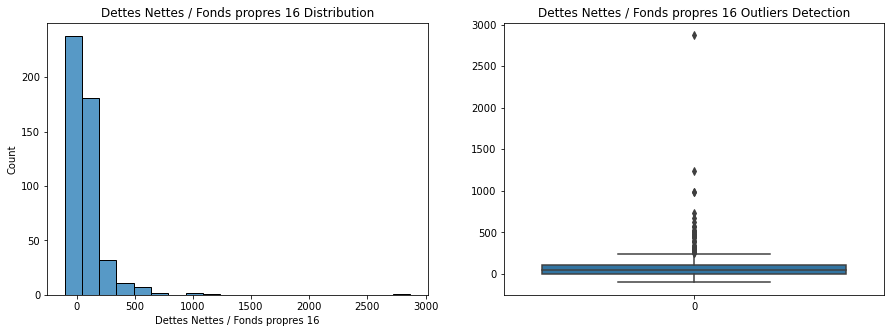

In [21]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.histplot(df["Dettes Nettes / Fonds propres 16"], bins = 20, ax = ax[0])
sns.boxplot(data = df["Dettes Nettes / Fonds propres 16"], ax = ax[1])
ax[1].set_title('Dettes Nettes / Fonds propres 16 Outliers Detection')
ax[0].set_title('Dettes Nettes / Fonds propres 16 Distribution')
plt.show()

Below we have several plots for some features in our dataset, where every single one has outliers in their composition

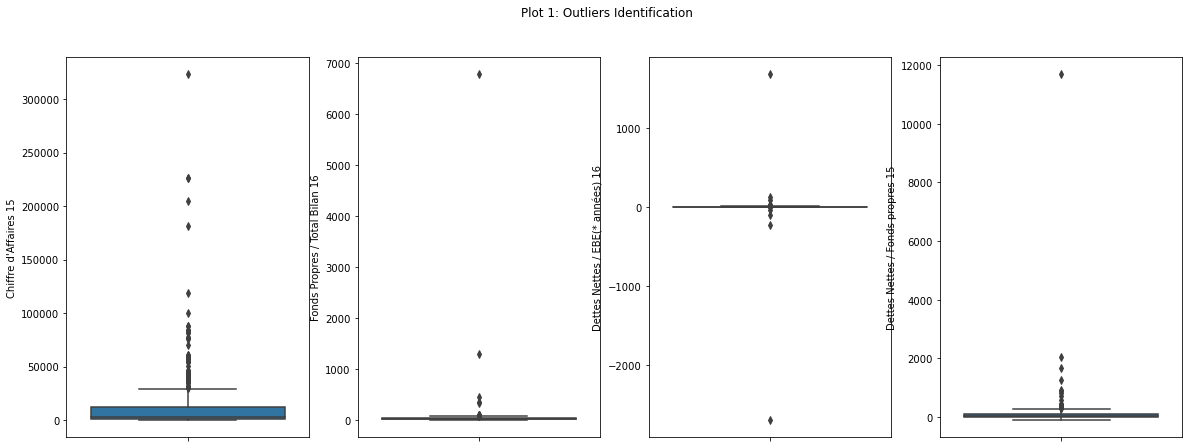

In [22]:
fig, ax = plt.subplots(1,4, figsize = (20,7))
sns.boxplot(data = df, y = "Chiffre d'Affaires 15", ax = ax[0])
sns.boxplot(data = df, y = 'Fonds Propres / Total Bilan 16', ax= ax[1])
sns.boxplot(data = df, y = 'Dettes Nettes / EBE(* années) 16', ax = ax[2])
sns.boxplot(data = df, y = 'Dettes Nettes / Fonds propres 15', ax = ax[3])
fig.suptitle('Plot 1: Outliers Identification')
plt.show()

#### 2.2.1 Outliers Treatment

Now we will analyse some features, the outliers present and try to make sustainable decisions over replace or keeping it.

We will not drop outliers, we already have a really small dataset. If we drop any outlier he will jeopardizing the model and we will finish with a worthless not generalized model.

First, we will define a function to plot and identify the existing outliers in our features.

In [23]:
X = df.drop('Taux', axis = 1)
y = df['Taux']

In [24]:
def box_plot(df, column):
    '''Function that accepts a dataset and a column to evaluate the existence of outliers'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    sns.boxplot(data = df[column]).set_title(f'Outliers detection of {column} feature')
    plt.show()
    
    return df[((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

##### 2.2.1.1 Montant

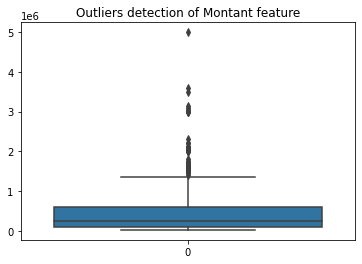

,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 15,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
130,36.0,5000000.0,50000000.0,50.0,NaN,12.0,NaN,14822.0,322.88,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
221,60.0,3600000.0,5036227.0,2000.0,12.0,12.0,181828.0,521.0,120.76,5.0,...,62.17,3.68,0.96,41.96,10.91,1.0,0.0,0.0,0.0,0.0
505,60.0,3500000.0,196244.0,250.0,12.0,NaN,20498.0,28705.0,40.04,3.0,...,42.41,0.40,0.38,58.64,57.93,1.0,0.0,0.0,0.0,0.0
611,39.0,3150000.0,3517500.0,50.0,NaN,NaN,43788.0,30012.0,31.46,5.0,...,27.24,NaN,NaN,72.10,96.05,1.0,0.0,0.0,0.0,0.0
284,84.0,3100000.0,4000000.0,1000.0,NaN,NaN,31693.0,54969.0,73.44,25.0,...,28.67,1.84,1.63,144.04,117.08,1.0,0.0,0.0,0.0,0.0


In [25]:
box_plot(X, 'Montant').sort_values(by = 'Montant', ascending  = False).head()

A right skewed distribution with outliers in our right.

We have 70 outliers for this feature what is a too much for a small dataset like ours. Our minimum outlier is 1_500_000 and the maximum is 5_000_000.

If we look closely to the data entries, we can see that this could make sense, we can see that Montant varies with invoice, debts and so on, all this values seem reasonable, we will keep them. The largest outlier with the biggest social capital, one of the greatest invoice evolutions during 2016.

##### 2.2.1.2 Effectifs

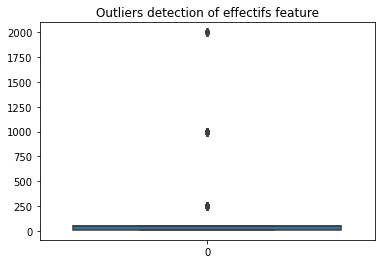

,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 15,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
3,60.0,2000000.0,10000.0,250.0,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
462,24.0,500000.0,2000000.0,250.0,12.0,12.0,60529.0,73061.0,20.70,1.0,...,30.48,1.34,1.84,0.62,0.75,0.0,0.0,0.0,1.0,0.0
457,36.0,150000.0,6900000.0,250.0,12.0,12.0,39767.0,30295.0,23.82,2.0,...,26.60,5.12,5.58,1.42,1.22,0.0,0.0,1.0,0.0,0.0
452,48.0,2000000.0,200000.0,250.0,12.0,12.0,58940.0,61340.0,4.07,8.0,...,19.65,2.37,2.52,1.35,1.50,0.0,0.0,1.0,0.0,0.0
451,60.0,2000000.0,2471215.0,250.0,12.0,12.0,29029.0,30946.0,6.60,3521.0,...,25.26,4.17,4.03,164.50,120.43,0.0,0.0,1.0,0.0,0.0


In [26]:
box_plot(X, 'effectifs').sort_values(by = 'effectifs').head()

We have 152 outliers for this feature, the outliers are 250, 1000 and 2000 number of employees. A big portion of companies are small with a maximum of employees of 50, however removing information from our model that some of our clients are medium to large companies is not a good option. We will not replace/drop any outliers, they are reasonable enough to be part of our final dataset.

##### 2.2.1.3 Nombre de mois de la période 16 & Nombre de mois de la période 17

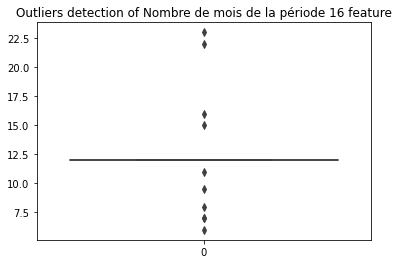

,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 15,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
151,48.0,250000.0,692000.0,50.0,6.0,12.0,NaN,1334.0,1.21,NaN,...,35.29,NaN,1.40,NaN,123.61,0.0,0.0,0.0,1.0,0.0
146,36.0,150000.0,150000.0,10.0,7.0,12.0,NaN,928.0,NaN,NaN,...,92.23,NaN,0.27,NaN,5.96,0.0,0.0,0.0,0.0,1.0
249,60.0,310000.0,75000.0,10.0,7.0,12.0,NaN,1597.0,20.71,NaN,...,18.75,NaN,1.86,NaN,205.13,0.0,0.0,1.0,0.0,0.0
598,36.0,30000.0,7622.0,50.0,8.0,12.0,NaN,304.0,1.33,NaN,...,14.98,NaN,0.22,NaN,30.98,0.0,0.0,0.0,1.0,0.0
168,24.0,100000.0,36498182.0,2000.0,9.5,12.0,NaN,4722.0,6.98,NaN,...,35.27,NaN,NaN,NaN,109.80,0.0,1.0,0.0,0.0,0.0


In [27]:
box_plot(X, 'Nombre de mois de la période 16').sort_values(by = 'Nombre de mois de la période 16').head()

In both columns we can only have values up to 12 (maximum number of months in an year). Every value above 12 will be replaced by the maximum admissible, 12.

In [28]:
df["Nombre de mois de la période 16"] = np.where(df["Nombre de mois de la période 16"] >12, 12,df['Nombre de mois de la période 16'])
df["Nombre de mois de la période 17"] = np.where(df["Nombre de mois de la période 17"] >12, 12,df['Nombre de mois de la période 17'])

##### 2.2.1.4 Chiffre d'Affaires 15 & Chiffre d'Affaires 16

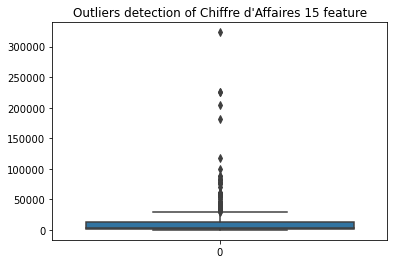

,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 15,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
221,60.0,3600000.0,5036227.0,2000.0,12.0,12.0,181828.0,521.0,120.76,5.0,...,62.17,3.68,0.96,41.96,10.91,1.0,0.0,0.0,0.0,0.0
506,36.0,1100000.0,32040000.0,1000.0,12.0,NaN,204762.0,206879.0,1.03,22.0,...,54.32,4.60,3.20,0.63,0.51,0.0,0.0,0.0,1.0,0.0
617,84.0,3050000.0,1500.0,10.0,12.0,NaN,225892.0,290225.0,28.48,0.0,...,13.70,0.32,1.51,5.57,29.41,1.0,0.0,0.0,0.0,0.0
200,36.0,820000.0,7398515.0,1000.0,12.0,12.0,225892.0,313.0,144.53,0.0,...,13.70,0.32,1.51,5.57,29.41,0.0,0.0,0.0,1.0,0.0
186,36.0,1500000.0,11000000.0,250.0,12.0,12.0,323400.0,827.0,11.36,0.0,...,33.50,2.97,3.10,18.68,29.25,0.0,0.0,0.0,1.0,0.0


In [29]:
box_plot(X, "Chiffre d'Affaires 15").sort_values(by = "Chiffre d'Affaires 15").tail()

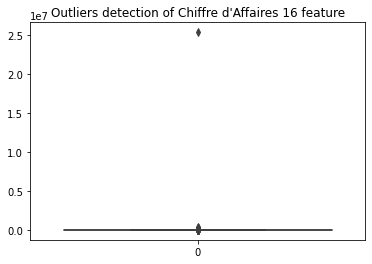

,Mois,Montant,capital social,effectifs,Nombre de mois de la période 16,Nombre de mois de la période 17,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 15,...,Fonds Propres / Total Bilan 16,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
208,60.0,198000.0,50000.0,50.0,12.0,NaN,939.0,262837.0,NaN,10.0,...,67.86,1.10,0.83,30.28,35.66,0.0,0.0,1.0,0.0,0.0
198,24.0,50000.0,10000.0,10.0,12.0,12.0,185.0,290225.0,28.48,40.0,...,16.97,0.45,0.41,149.00,85.33,0.0,0.0,0.0,0.0,1.0
617,84.0,3050000.0,1500.0,10.0,12.0,NaN,225892.0,290225.0,28.48,0.0,...,13.70,0.32,1.51,5.57,29.41,1.0,0.0,0.0,0.0,0.0
184,48.0,1759000.0,1360800.0,1000.0,12.0,12.0,37023.9,326650.0,0.01,5.0,...,44.67,2.60,3.01,58.10,58.80,0.0,0.0,1.0,0.0,0.0
69,24.0,100000.0,17609000.0,250.0,12.0,12.0,NaN,25328000.0,NaN,NaN,...,13.87,NaN,3.76,NaN,1.39,0.0,1.0,0.0,0.0,0.0


In [30]:
box_plot(X, "Chiffre d'Affaires 16").sort_values(by = "Chiffre d'Affaires 16").tail()

Both this columns represent the turnover in the 2015 & 2016. If we look closely, with just few exceptions, the pair wise values for each data entry  (2015 & 2016 columns) are close enough, meaning that it's not coincidence and they are not random. We will keep them too.

The only value that we will replace is the entry 69 of "Chiffre d'Affaires 16" that is too different from the other outliers, that will be replaced for the the maximum value of our distribution.

In [31]:
max_column = df["Chiffre d'Affaires 16"].quantile(0.75) + 1.5 * (df["Chiffre d'Affaires 16"].quantile(0.75) - df["Chiffre d'Affaires 16"].quantile(0.25))

df["Chiffre d'Affaires 16"] = np.where(df["Chiffre d'Affaires 16"] == 25328000, max_column ,df["Chiffre d'Affaires 16"])

##### 2.2.1.5 EBE(retraité des loyers de leasing) 15 & EBE(retraité des loyers de leasing) 16

In [32]:
def box_plot_1(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    return df[column][((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

In [33]:
box_plot_1(X, "EBE(retraité des loyers de leasing) 15").sort_values()

492      95.0
681      97.0
493     101.0
450     102.0
683     118.0
        ...  
463    1765.0
101    2391.0
121    3169.0
451    3521.0
465    7087.0
Name: EBE(retraité des loyers de leasing) 15, Length: 79, dtype: float64

In [34]:
box_plot_1(X, "EBE(retraité des loyers de leasing) 16").sort_values()

623     114.0
486     121.0
493     123.0
94      128.0
678     131.0
        ...  
86     2180.0
121    3093.0
451    3101.0
101    4001.0
465    9531.0
Name: EBE(retraité des loyers de leasing) 16, Length: 101, dtype: float64

Yet again, we have a big bunch of outliers in our dataset, however both this columns follow a pattern that we already seen. Most of the pair-wise outliers in one year column are in the other too. Introducing the sensation that again they are not at random and should consider it in our model.

I will not include the other features in this project because the decision this will make this project too lengthy and no more changes were done.

Nevertheless, I reinforce that knowing what each feature means, the outlier management would be better.

### 2.3 - Data Predictors

In this subchapter, we will try to understand a little bit more our dataset and try to understand which features may be the best predictors to our model.

#### 2.3.1 - Niveau de Risque - Taux

As suggested by the dataset supplier, after the loan is approved it is given a Risk Level, so we immediadetly think that Risk should be a good predictor to our loan interest.

Below we can verify that loans vary with the risk the level for each company, with the best Risk Score companies being the ones with lower interest rate for the loans.

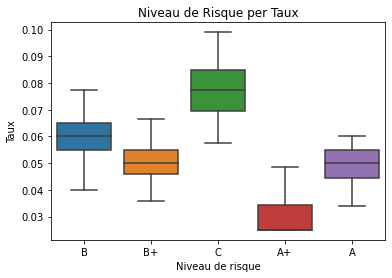

In [35]:
sns.boxplot(y = df['Taux'], x = niveau_risque)
plt.title('Niveau de Risque per Taux')
plt.show()

#### 2.3.2 - Effectifs - Taux

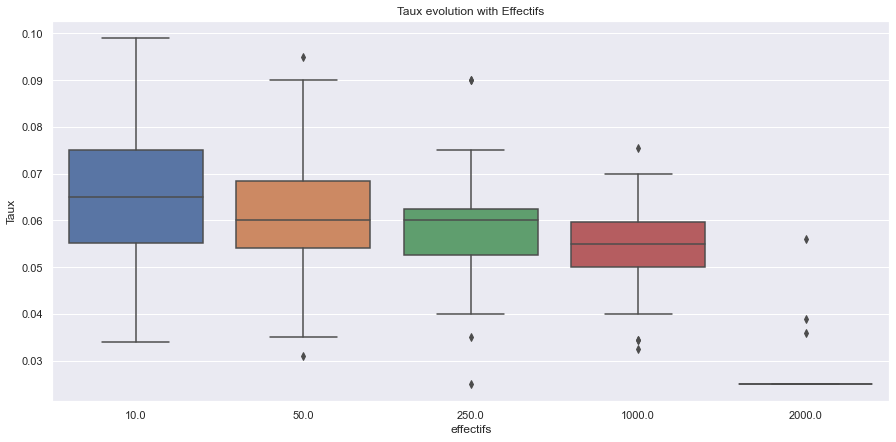

In [36]:
sns.set(rc={'figure.figsize':(15,7)})

sns.boxplot(y = df['Taux'], x = df['effectifs'])
plt.title('Taux evolution with Effectifs')
plt.show()

We can see that there is slight but gradual decline in the interest rates with the number of employees.

This is not a strong predictor as Niveau de Risque, however it should be a predictor used by the model.

#### 2.3.3 - Number of Months - Taux

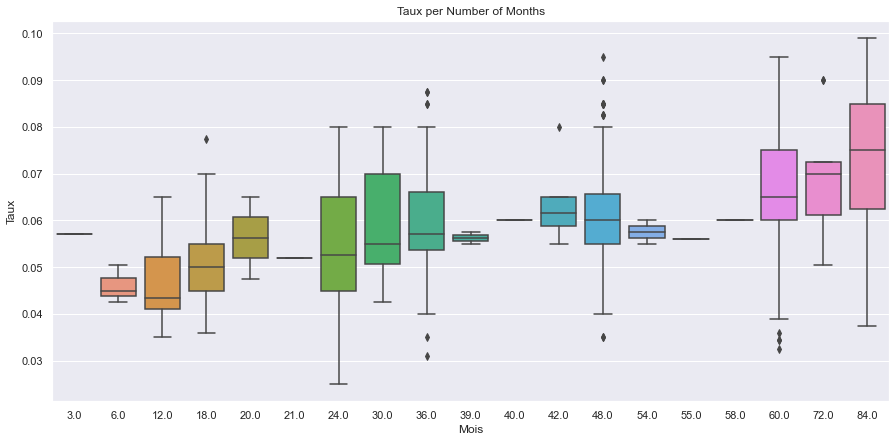

In [37]:
sns.set(rc={'figure.figsize':(15,7)})

sns.boxplot(y = df['Taux'], x = df['Mois'])
plt.title('Taux per Number of Months')
plt.show()

We have a gradual increase rates with the number of months (I'm not sure, but I will assume that this is the time of the loan).

Yet again not that strong as Risque, but strong enough for me to believe that can be a good predictor for our model later on.

In the next chapter will have two objectives, outliers treatment & NaN treatment.

### 2.4 - Feature Engineering - Mois & Effectifs

There are some features that have a discrepancy between magnitude distribution. Having some discrete variables such as number of months with just one entry for one class, others with 5, etc..., is not good information to our model, and we will not be able to generalize this information.

So we will group our this variables into bin groups to enable a better read of our model.

In [38]:
#Grouping data between bins of 12 or 24 months
X['Mois'] = pd.cut(X['Mois'], labels = [0,1,2,3,4], bins = [0,24,36,48,60,84])

#Group 1000 & 2000 as one group, group 3 will be companies with more than 1000 effectifs
X['effectifs'] = pd.cut(X['effectifs'], labels = [0,1,2,3], bins = [0,10,50,250,2000])

We group the variables into ranges to allow the model to diferentiate and understand distances between data entries but at the same time don't lose that much information in the proccess.

### 2.5 - NaN Imputer

KNN imputer will be used to fill NaN values in our dataset. As we have features with more than 300 NaN values, imputing with some kind of distribution metric will introduce a tremendous bias in our model, that will not make our results any better. So we'll try to impute the values with the help of KNN imputer that will fill the NaN values with the mean values of the closest neighbours for that data NaN point

We will use 5 neighbors to perform this imputation.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights = 'distance')

#Fit and transform the X_train
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

#Transform the X_test to not introduce Bias in our model
X_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)

### 2.6 Anova Test - Number of features

We still have 31 features in our dataset, for 688 entries. This will still cause a lack of generalization of our model and a probable overfitting.

With this in mind, we'll have to reduce our number of features right away.

We will try to select only 15 features, to do this, we will perform an Anova Test for numeric variables to address if the independent variables have influence on the dependent variables or are just at random. This is done comparing the difference of means using the variance

The features with lower influence will have a lower F_statistic values, a pvalue below the threshold of 0.05 that allows to reject the hypothesys that 
mean for different features are equal.

We will try to reduce the number of features to 12, if the requirements are met.

In [41]:
from sklearn.feature_selection import f_classif

# Getting f_statistic and  p_values
F_statistic, p_values = f_classif(X_train, y_train)

#Pass the data to a dataframe
importance_features = pd.DataFrame(data = {'Feature': X_train.columns.values,'f_statistic_score': F_statistic, 
                                    'p_values': p_values.round(decimals=6)})

#Sort the data by F_score
importance_features.sort_values(by = ['f_statistic_score'], ascending = False, ignore_index = True, inplace = True)

#We will save the best 12 features into a list
top_num_features = importance_features.iloc[:12,0].to_list()

#Save the features to remove
columns_drop = importance_features.iloc[12:,0].to_list()

#We will save in a list the features to remove

importance_features[:12]

,Feature,f_statistic_score,p_values
0,Risque__A+,32.721040,0.0
1,Risque__C,11.587195,0.0
2,EBE(retraité des loyers de leasing) 16,10.022340,0.0
3,EBE(retraité des loyers de leasing) 15,7.745331,0.0
4,Capacité de remboursement (FCCR) 16,5.018214,0.0
5,Risque__B,4.757395,0.0
6,Risque__B+,3.853281,0.0
7,Mois,3.083171,0.0
8,capital social,2.988120,0.0
9,Fonds Propres 15,2.789371,0.0


The dataset is sorted per F_statistics, with the top values being the ones that have a biggest difference in terms of the variance of the features in study.

Luckily enough we were able to reject H0, p_values below 0.05, so we are good to advance.

### 2.7 Pearson Correlation

As ANOVA don't address the relationship degree between two variables. We will now, test for the correlation between variables, if we found features with a correlation superior to abs(P), we will drop it.

We will do this to not repeat information regarding our features and keep with the minimum features possible.

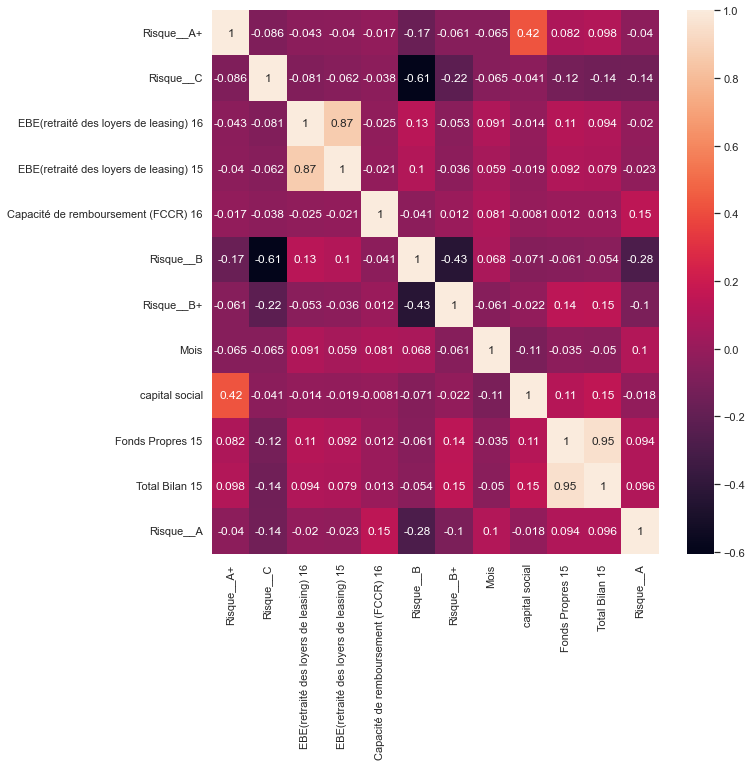

In [42]:
#Plot the pearson correlation to verify relationships
corrmat = X_train[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, annot = True)
plt.show()

Both 'Fonds Propres 15', 'Total Bilan 15' have a strong relationship with each other and with Chiffre d'Affairs, so we will drop these two.

Let's to finalize drop the not chosen features by ANOVA.

In [43]:
#Select columns to drop after correlation
columns_drop = ['Fonds Propres 15', 'Total Bilan 15']

#Extend the list with the columns that were not selected in Anova Model
columns_drop.extend(importance_features.iloc[15:,0].to_list())

#Extend the list with the columns that were not selected in Anova Model
def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)
    
# apply to X_train
col_to_drop(X_train, columns_drop)

# apply to X_test
col_to_drop(X_test, columns_drop)

## Chapter 3. - Modelling

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict

First thing to do is to standardize our data, we have very different magnitudes in our features.

Fit and transform the X_train, just transform the X_test, to not introduce bias into our model.

### 3.1 - Feature Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

We will analyse 5 different models into our dataset, XGB (one of the most known) will not be tested because we have a small number of features and this will not be able to generalize well, we will focus in the simpler models.

Cross validation will be used to allow the resampling of 5 folds of different segments and prevent, yet again, overfitting.

We will evaluate both RMSE (root mean squared error) & R2 (goodness of fit). Both this metrics are the standard to evaluate any linear regression problems, while RMSE is a difference squared of the predicted value to the actual one, R2 will allows to understand how much part of the model can be explained by our features.

### 3.2 - Feature Standardization

In [46]:
'''Models'''

#Definition of models to test
models = [
          ('RForestRegressor', RandomForestRegressor(random_state = 42)), 
          ('DTreeRegressor', DecisionTreeRegressor(random_state = 42)),
          ('SGD', SGDRegressor(random_state = 42)),
          ('Lasso', Lasso(random_state = 42)), 
          ('Ridge', Ridge(random_state = 42)),
        ]

'''Accuracy'''

#Metrics to evaluate
scoring_metrics = ['neg_mean_squared_error','r2']

#Initialize a dataframe to append the RMSE, R*2 and STD for each model RMSE
dict_metrics = pd.DataFrame(index = ['R*2','RMSE_mean','RMSE_standard_deviation'])

#Cross validation will be use with kfold to divide the train datasets into different folds
for model_name, model in models:
    #Initiate KFold
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Perform a cross validate
    cv_scores = cross_validate(model, X_train_scaled, y_train, cv = kfold, scoring = scoring_metrics)
    
    #Calculate the RMSE - Root Mean Square Deviation
    model_rmse = np.sqrt(-cv_scores['test_neg_mean_squared_error'])
    
    dict_metrics[model_name] = [np.mean(cv_scores['test_r2']), np.mean(model_rmse), np.std(model_rmse)]

dict_metrics

,RForestRegressor,DTreeRegressor,SGD,Lasso,Ridge
R*2,0.764520,0.572674,0.754587,-0.007186,0.742083
RMSE_mean,0.006278,0.008453,0.006398,0.012997,0.006556
RMSE_standard_deviation,0.000411,0.000368,0.000390,0.000373,0.000310


RForest Regressor, SGD & Ridge presented a good R2 and RMSE, with a goodness of fit greater than 0.7.

RMSE for the three models is not perfect, however an error of around 0.6% for a mean interest loan value of 6.1% is not bad either.

So we will accept, and follow with the hyperparameter for SGD Regressor.

### 3.3 - SGDRegressor - Hyperparameter Tuning

First thing we will initiate a dataset to append the results from our Train and Test sets.

In [47]:
sgd_metrics = pd.DataFrame(index = ['R*2', 'RMSE_mean'])

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

sgd_reg = SGDRegressor(max_iter=100000, random_state = 42)

param_grid = [{'loss' : ['squared_error', 'huber', 'epsilon_insensitive'],
                'penalty' : ['l1', 'l2', 'elasticnet'],
                'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
             ]
              
gridcv_search = GridSearchCV(sgd_reg,param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

gridcv_search.fit(X_train_scaled, y_train)

y_pred = gridcv_search.predict(X_test_scaled)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

test_r2 = r2_score(y_test, y_pred)
sgd_metrics['RFRegressor - Test'] = [ np.round(test_r2,5), np.round(test_rmse,5)]
sgd_metrics['RFRegressor - Train'] = dict_metrics['RForestRegressor'].iloc[0:2]
sgd_metrics

,RFRegressor - Test,RFRegressor - Train
R*2,0.82104,0.764520
RMSE_mean,0.00580,0.006278


We were able to achieve an optimization of the model, and the results obtain don't suggest an overfitting. Model is accepted.

Below we can find the best estimator for our model.

In [49]:
gridcv_search.best_estimator_

SGDRegressor(alpha=0.001, learning_rate='adaptive', loss='huber',
             max_iter=100000, penalty='elasticnet', random_state=42)

### 3.3 - Predictions Evaluation

#### 3.3.1 - Coefficients

Let's verify which contribute features contribute the most for the outcome of the model.

In [50]:
gridcv_search.best_estimator_.coef_

array([ 0.00496145,  0.        ,  0.        ,  0.00031518,  0.        ,
        0.        ,  0.        ,  0.        , -0.00321543, -0.00400843,
        0.        , -0.00297201,  0.00714259])

In [51]:
model_coeff = pd.DataFrame(index = X_test.columns, data = gridcv_search.best_estimator_.coef_, columns = ['Coefficients'])
model_coeff.sort_values(by = 'Coefficients')

,Coefficients
Risque__A+,-0.004008
Risque__A,-0.003215
Risque__B+,-0.002972
capital social,0.000000
Chiffre d'Affaires 15,0.000000
EBE(retraité des loyers de leasing) 16,0.000000
Capacité de remboursement (FCCR) 15,0.000000
Capacité de remboursement (FCCR) 16,0.000000
Fonds Propres 16,0.000000
Risque__B,0.000000


We can conclude that Risque_C and Mois were the features that impact positively the model, meaning that higher this two values are higher the interest rates. At the other hand, Risque A+,A,B+ and effectifs are the top features that impact negatively the interest rates, allowing a lower interes rates.

#### 3.3.2 - Predictions

To end this subchapter we will conclude about the top and worst predictions made by our model.

##### 3.3.2 - Top Predictions

In [52]:
predicted_Taux = pd.DataFrame()
predicted_Taux['y_difference'] = abs(y_pred-y_test)
predicted_Taux['y_real'] = y_test
predicted_Taux['y_pred'] = y_pred
predicted_Taux = pd.concat([predicted_Taux.reset_index(drop = True), X_test], axis = 1)
top_predictions = predicted_Taux.sort_values(by = 'y_difference', ascending = True).head()
worst_predictions = predicted_Taux.sort_values(by = 'y_difference', ascending = False).head()
top_predictions

,y_difference,y_real,y_pred,Mois,capital social,Chiffre d'Affaires 15,EBE(retraité des loyers de leasing) 15,EBE(retraité des loyers de leasing) 16,Capacité de remboursement (FCCR) 15,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
79,0.000053,0.0570,0.056947,1.0,3000000.0,61034.000000,5.000000,5.000000,1.030000,1.130000,5320.000000,0.0,0.0,1.0,0.0,0.0
66,0.000251,0.0675,0.067751,3.0,3557120.0,6946.000000,3169.000000,3093.000000,1.220000,1.240000,4069.000000,0.0,0.0,1.0,0.0,0.0
25,0.000251,0.0485,0.048249,1.0,12000.0,281.000000,20.000000,10.000000,2.180000,1.790000,55.000000,0.0,0.0,0.0,1.0,0.0
48,0.000287,0.0700,0.069713,0.0,25000.0,1009.859603,69.276463,10.000000,2.855036,43.000000,67.000000,0.0,0.0,0.0,0.0,1.0
83,0.000323,0.0650,0.065323,3.0,53352.0,13852.761736,11.663353,11.783653,1.518941,1.687525,837.232851,0.0,0.0,1.0,0.0,0.0


4 out of 5 top predictions were made when the actual Risque was B, one of the lowest impactful features in our model, suggesting that even when the Risque is not known the model is able to generalize well and predict correctly.

The balance given from Mois, effectifs, Chiffre and EBE that are not outliers in our initial dataset, provide sufficient and balanced information. We have a take closer to look to the feature Mois we see that we have the 4 possible classes, Mois has we predict a good predictor for our model.

The difference of values from our features in the top predictions makes me believe that more than any feature, only the feature combinations allowed a valid generalization.

##### 3.3.2 - Worst Predictions

In [53]:
worst_predictions

,y_difference,y_real,y_pred,Mois,capital social,Chiffre d'Affaires 15,EBE(retraité des loyers de leasing) 15,EBE(retraité des loyers de leasing) 16,Capacité de remboursement (FCCR) 15,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Risque__A,Risque__A+,Risque__B,Risque__B+,Risque__C
9,0.017724,0.0485,0.030776,1.0,50000000.0,3656.521731,286.198101,25.0,84.922998,20.04863,1479.424781,0.0,1.0,0.0,0.0,0.0
53,0.017687,0.0620,0.044313,0.0,527000.0,32641.599699,345.255512,15.0,3.604876,5.08000,1270.000000,0.0,0.0,0.0,1.0,0.0
87,0.013901,0.0600,0.073901,1.0,100000.0,1989.159133,71.885340,216.0,3.999768,1.84000,387.000000,0.0,0.0,0.0,0.0,1.0
103,0.013138,0.0650,0.078138,2.0,30000.0,728.000000,139.288845,204.0,2.070000,2.24000,87.000000,0.0,0.0,0.0,0.0,1.0
35,0.013069,0.0875,0.074431,1.0,500000.0,2326.000000,762.000000,776.0,1.670000,1.92000,886.000000,0.0,0.0,0.0,0.0,1.0


Model was not able to capture the right interest loan rates when they are large, meaning that probably we was not able to capture of the combination between the months that the company has to pay out the loan with invoice and EBE that they have.

## Chapter 4. - Conclusion & Next Steps

We were able to achieve good results with our model, however I will highlight some aspects of project and propose new things to try and improve,

- As we have a small dataset and maybe there are not more available data, a controlled upsampling should be used to increase the number of entries.

- Data came with several features as an interval, is impossible to not introduce a lot of Bias treating this. We should be aware that if these are important features, we are biasing the model greatly.

- Features should come with a glossary for users and remaining staff know what they are testing, and which are the accurate conclusions to be taken. Outliers treat was impacted by this as it was point out above.

- If we are able to increase the number of entries, with new data or upsampling, more complex models can be used and maybe we can achieve even better results.

- Outlier treatment impacted the model, I believe that was not that much, however the model should be repeated with a new approach to the outliers management.